### Applying Least Squares by hand  

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**Blood Pressure.** Suppose that each of 10 patients is treated with the same amount of
two different drugs that can affect blood pressure. To be specific, each patient is first
treated with a standard drug A, and their change in blood pressure is measured. After
the effect of the drug wears off, the patient is treated with an equal amount of a new
drug B, and their change in blood pressure is measured again. These changes in blood
pressure will be called the reaction of the patient to each drug. For $i = 1,..., 10$, we
shall let $x_i$ denote the reaction, measured in appropriate units, of the ith patient to
drug A, and we shall let $y_i$ denote her reaction to drug B. The observed values of
the reactions are as given in the table above. The 10 points $(x_i, y_i)$ for $i = 1,..., 10$ are
plotted. One purpose of the study is to try to predict a patient’s reaction
to drug B if their reaction to the standard drug A is already known.

Table of reaction to two drugs, where the variable $x_i$ represents the response to the drug A, and the $y_i$ represents the response of the pacient to the drug B.

| $i$  | $x_i$  | $y_i$  |
|----|------|------|
| 1  | 1.9  | 0.7  |
| 2  | 0.8  | -1.0 |
| 3  | 1.1  | -0.2 |
| 4  | 0.1  | -1.2 |
| 5  | -0.1 | -0.1 |
| 6  | 4.4  | 3.4  |
| 7  | 4.6  | 0    |
| 8  | 1.6  | 0.8  |
| 9  | 5.5  | 3.7  |
| 10 | 3.4  | 2.9  |


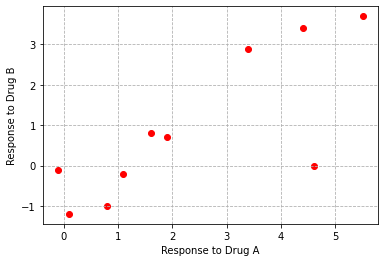

In [2]:
x = np.array([1.9, 0.8 , 1.1 , 0.1 , -0.1 , 4.4, 4.6, 1.6, 5.5, 3.4])
y = np.array([0.7, -1.0, -0.2, -1.2, -0.1, 3.4, 0.0, 0.8, 3.7, 2.9])

plt.scatter(x,y, color = "red")
plt.grid(True, linestyle = "--")
plt.xlabel("Response to Drug A")
plt.ylabel("Response to Drug B")
plt.show()

In [3]:
# utilizing the formula of the coefficients from the Least Squares method we will plot the line that
# better fits (minimizing the RMSE) these points.

y_mean = [0]*10
x_mean = [0]*10

for i in range(9):
    y_mean[i] = np.mean(y)
    x_mean[i] = np.mean(x)

y_mean = np.array(y_mean)
x_mean = np.array(x_mean)

angular_coef = sum((y - y_mean)*(x-x_mean)) / sum((x - x_mean)**2)
linear_coef = max(y_mean) - angular_coef * max(x_mean)

print(angular_coef, linear_coef)

0.7183398177481553 -0.7737317753532015


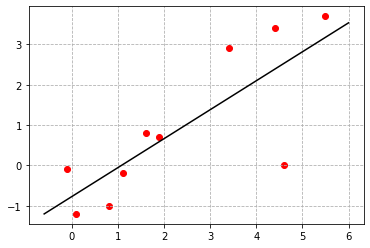

In [4]:
# Here I'm showing the fit of the line in the dataset
w =  np.linspace(min(x) - 0.5, max(x) +0.5, 100)
z = angular_coef * w + linear_coef

plt.plot(w,z, color = "black")
plt.scatter(x,y, color = "red")
plt.grid(True, linestyle = '--')
plt.show()


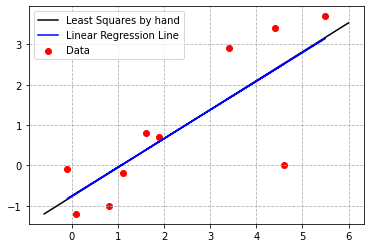

In [5]:
# Here it is proofing that our calculations are right, comparing to the fit of the linear regression. 
# Because the line from linear regression is the same from the Least Squares for linear variables.

from sklearn.linear_model import LinearRegression

X = x.reshape(-1,1)
reg = LinearRegression().fit(X,y)
predictions =  reg.predict(X)

plt.plot(w,z, color = "black" , label = "Least Squares by hand")
plt.plot(X, predictions, color = "blue", label = 'Linear Regression Line')
plt.scatter(X,y, color = 'red', label = "Data")
plt.grid(True, linestyle = "--")
plt.legend()
plt.show()


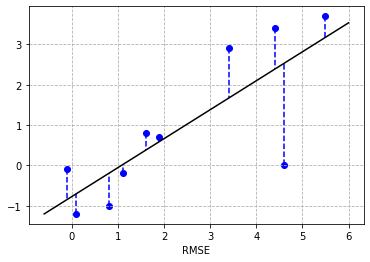

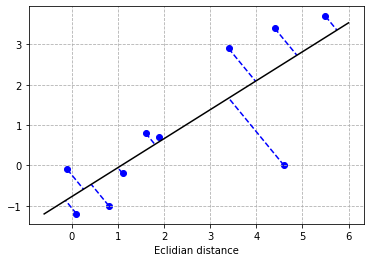

In [11]:
# I'm creating two graphics to show the difference between the euclidian distance and the sum of
# the squares error at the Least Squares method. In one graphic we see the line that minimizes
# that minimizes the sum of the squares, and in the other we see the minimum euclidian distance 
# of the line to the points.

for x_i, y_i in zip(x, y):
    y_pred_i = angular_coef * x_i + linear_coef
    plt.plot([x_i, x_i], [y_i, y_pred_i], color='blue', linestyle='--')

    # Finding the point at the line that has the minimum euclidian distance. 
    # This point satisfies the equation y = mx + b and the perpendicular that passes for (x_i,y_i)
    # We can solve the equations to obtain that the perpendicular line has the inclination of -1/m
    # and the equation is y - y_i = (-1/m)(x-x_i), and with that we can solve to x, and obtain the
    # result.

w =  np.linspace(min(x) - 0.5, max(x) +0.5, 100)
z = angular_coef * w + linear_coef

plt.plot(w,z, color = "black")
plt.xlabel("RMSE")
plt.scatter(x,y, color = "blue")
plt.grid(True, linestyle = '--')
plt.show()


for x_i, y_i in zip(x,y):
    x_int = (y_i + (1/angular_coef)*x_i - linear_coef) / (angular_coef + (1/angular_coef))
    y_int = angular_coef * x_int + linear_coef
    
    # Drawing the line that represents the euclidian distance
    plt.plot([x_i, x_int], [y_i, y_int], color='blue', linestyle='--')

plt.plot(w,z, color = "black")
plt.scatter(x,y, color = "blue")
plt.xlabel("Eclidian distance")
plt.grid(True, linestyle = '--')
plt.show()